In [114]:
from bs4 import BeautifulSoup
import urllib.request
import requests
import ssl
import pandas as pd
import spacy # language models
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re
import contractions
import inflect
from wordcloud import WordCloud
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

import pickle

In [115]:
pageNo = 1
productUrlMain = "https://www.amazon.in/product-reviews/B017NPCSLI/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber="
productUrlMain

'https://www.amazon.in/product-reviews/B017NPCSLI/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews&pageNumber='

In [116]:
headers = {
    'authority': 'www.amazon.com',
    'pragma': 'no-cache',
    'cache-control': 'no-cache',
    'rtt': '50',
    'downlink': '6.65',
    'ect': '4g',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-user': '?1',
    'sec-fetch-dest': 'document',
    'accept-language': 'en-US,en;q=0.9,la;q=0.8',
    'cookie': 'ubid-main=133-9061931-0297943; sid="u39jVVzRWP15jSjEJsTdwA==|9ucGRH1SUgtb9e1e982gkm5/DayNcyYRTYXgNPZNa+g="; x-main="mE3y@VSbrs7MHrVVNnP1GN@GVZOaUJqe"; at-main=Atza|IwEBIEv12ButU1VeMnrsclL17GM9BJ-80JPgG6TYbBZbAXZckOoe9wa7IyBNlbjEK-8F1AIpcMN4VR2tIGeWA0vdJ4PpvJA1R0N5Qn0zMsC4B6Y4megebgi3Jvq2BJ1g0jZRL9j9iYhPHFSdTUesgv9Q7p_PRb4dNNjnfnUGDeVxZHaCdWr-Iqatk6j8KcKYkusa9mKmGsz-2x_KF6xgU6Nx7QFE2yxAbegk8SnGIFiys8r99A; sess-at-main="NNbbNBJIIdO6ZUsf30V6vNV2aj2QETHGwAkzG3gX4ZE="; sst-main=Sst1|PQE1PjQcFvrt9Y3KNw8yA3eLEIpcrmUeovHZU8z9TftQ5cSjvbwa41EIkU6fNZnswQN4ItbnsOHE1dW6jzxtQ5W5bIW0nVNoX1SqhosV1IFUTgrfEJwe91NBnbMk4QMpfHZzjnBCtuP1l57JiSOetaBnrD4WZxe2IlQpTxhK57-mFsDAyjjPTpdWIsZFwK9KLFywkHaoJvVh6onccpXzMt_dEhnmwr3OeBWfFPagGojOYGpcnso44cDXzkLBMph3j_EnVk0ms-t-HRbuo64GAJ0O-Gc0e6o3D4JVCIy3pd9tERCyOn9iggvsICLQ5NDuq3IPop8KSk3xevMVZoEEucCO11ml7yWYg_Yo9wAlBGqRX9C4697s9qyM_llnAG0nn1KGTS-2BGyGl_7W47MtvpGTCtRdTp9jIJMFiwFPjUQ6h9to0Hligj45NYrF0p1JtCsH; i18n-prefs=USD; lc-main=en_US; aws-ubid-main=176-3363682-5411304; aws-session-id=140-0883594-3508442; aws-session-id-time=2232452694l; aws-session-token="4AcXH13Lb7gLaLAbVWxzhrnUWw5VZWqZi720/Dto7jgpDRcELFSp5rdL/70JOV/CzC3Q7NX5fwXr1hOyO1SGinrTZ2/mJwX9JI22zhbAj64paG31aDmWkELeUqOO9jxn87nBCHKuubVjDeLMfQoBykloAFSaSt6E/K+EiIG2dMyk5aC6G1Icjvrl1bdKmSGt3a+v4I/vPmozdi8jzhcihQnIA5aY3o5i/8p+kzEfCSQ="; sess-aws-at-main="OAo44oXc4/XY6EgTI5DzZjccXmr3Pf10LEqvTiATPBk="; regStatus=registered; aws_lang=en; s_fid=54929DF7E2EC5594-1DEC0D72EFDC6854; s_vn=1633268724773%26vn%3D1; s_invisit=true; s_cc=true; aws-target-visitor-id=1601732725193-893467; aws-target-data=%7B%22support%22%3A%221%22%7D; aws-userInfo=%7B%22arn%22%3A%22arn%3Aaws%3Aiam%3A%3A231071709544%3Aroot%22%2C%22alias%22%3A%22%22%2C%22username%22%3A%22jeff%2520james%22%2C%22keybase%22%3A%22%22%2C%22issuer%22%3A%22https%3A%2F%2Fwww.amazon.com%2Fap%2Fsignin%22%2C%22signinType%22%3A%22PUBLIC%22%7D; skin=noskin; csd-key=eyJ2IjoxLCJraWQiOiIzZTQwMDciLCJrZXkiOiJFTGpoTmpBeGhmNjgvTGdKQVNuTDBUcWx0a2JYaHRQdkVLRTRienk0bmVUM2Jnd0pHTHVlUlBjYkxya0RQVVRWMlV1YWI5WWZBMkZXTG93c1BxUUNtM21BL2RCbitJVkVuSmhFZkRqY2JUWEQrTllWbGlQSkhDeU9QYkpKa0RkYmNQRWtvOXNZa0VzU3hOZXFEbkZkUkk4b3FzY0dNZUU3MWFEVHcrRlNFVCtZYmd3amc3V0YyNjBoK29qQ0p6cVhkRDJzUVJBeVFtNmJxZG1TdXkzS092YkRIM293amNseTZVa0tKeGYzLzE5enA4OG10VWM2UG53clVvelQxMzdSbVpkVnlsZisvbjdSTGI0WkUzbjMzWDlEL1lsbmxhK0duLytlaU9qTjMzQUd3NG1NRC9oOTc0dFlqdmFQWnJDT2xKTk1RNmFVY3FpTDhReWQ0TUxwVFE9PSJ9; session-id-apay=143-6467005-0669008; session-id-time=2082787201l; session-id=146-2689202-9572416; s_dslv_s=More%20than%2030%20days; s_depth=2; s_dslv=1606267728256; s_nr=1606267728265-Repeat; session-token="gg4ozkVpSmo/CMUdJGU4vWV1Ap01LEGeSpGlQkj7ZEa3VEBeb+7xCHNDf8DV2y2tr45chYDEFySwu8cJx7Y1FN6QdAhBjINCqmSudE2ms/C0+61bcVE1sGzdOXLfxh57MgpZuzU1Xi/z3o8TsWfewFly/Kl6Aq0tKSWEPXT08CejwjX16Neh+Q00ofyScckwc/Qv/Q0oYIUysh3th6kRYg=="; csm-hit=tb:RP2649Z9F69V9KV5A8BV+sa-738Q8AECSK2TQNV33QMY-2WTAQEBB75E5T1SDK1R6|1606489267955&adb:adblk_yes&t:1606489267955',
}
resp=""
finalResp = ""
for i in range(1,101):
    productUrl = productUrlMain+str(i)
    #print(productUrl)
    resp = requests.get(productUrl, headers=headers)
    finalResp+=resp.text
    resp = ""

In [117]:
def get_review_stars(soup_obj: BeautifulSoup) -> str:
    try:
        review_str = soup_obj.find('a', {"class": "a-link-normal"}).get_text()
        review_str = review_str.lower()
        review_str = review_str.replace(" out of 5 stars", "")
        return review_str
    except Exception as e:
        return 'no_stars'
        print(e)

In [118]:
def get_review_body(soup_obj: BeautifulSoup) -> str:
    try:
        review_body = soup_obj.find('span', 
            {"class": "a-size-base review-text review-text-content"}
        ).get_text().strip()
        return review_body
    except Exception as e:
        return 'no_body'
        print(e)

In [119]:
def get_review_components(soup_obj: BeautifulSoup) -> dict:
    return {
        'stars':get_review_stars(soup_obj) , 
        'body': get_review_body(soup_obj), 
        'date': get_review_date(soup_obj)
    }

In [120]:
def get_review_date(soup_obj: BeautifulSoup) -> str:
    try:
        review_date = soup_obj.find('span', 
            {"class": "a-size-base a-color-secondary review-date"}
        ).get_text().strip()
        review_date = review_date.replace("Reviewed in India on ", "")
        return review_date
    except Exception as e:
        return 'no_date'
        print(e)

In [121]:
soup = BeautifulSoup(finalResp, "html.parser")
reviews = soup.find_all("div", {"class": "a-section review aok-relative"})

In [122]:
records = [get_review_components(rev) for rev in reviews]
df = pd.DataFrame(records)

In [123]:
df

stars                                               body  \
0     1.0  This type of Guitar has following disadvantage...   
1     5.0  As a layman (who doesn't know much about guita...   
2     5.0  For 2000 rs its a really really good purchase....   
3     1.0  pros:* The guitar has fair sound for its price...   
4     5.0  It is only for beginners. The price is quite s...   
5     5.0  The media could not be loaded.\n              ...   
6     1.0  I'm beginner , I watched videos on YouTube and...   
7     5.0  This is actually very nice for beginners. I lo...   
8     1.0  I have got damaged item . There is crack on fr...   
9     5.0  I have buy one 2 years ago.. I m still using i...   
10    5.0  As expected stylish, good sound, best for begi...   
11    5.0  Writing a review after extensive usage for ove...   
12    5.0  Excellent product. Its my first guitar. And al...   
13    4.0  I did not get a pick. i had to buy it from loc...   
14    4.0  It was delivered 2 days earlier... Nice Delive...   
15    4.0  The media could not be loaded.\n              ...   
16    1.0  Product is not good. delicate and not so good ...   
17    3.0  this is a good thing that one can have a guita...   
18    5.0  Hi .. This is the most awesome guitar for the ...   
19    2.0  No doubt the price is too good. But if you wan...   
20    5.0  Purchased this a year ago and gifted to my lov...   
21    5.0  I'm writing this a couple of days after delive...   
22    1.0  This was an intended birthday present for a 13...   
23    5.0  The media could not be loaded.\n              ...   
24    1.0  I'm reviewing this after 2 years.If you don't ...   
25    5.0  If you are a complete beginner and wish to sta...   
26    1.0  I had a very pathetic experience with this gui...   
27    1.0  It looks beautiful if you are new to guitar li...   
28    3.0  Good presentation.Average built quality.Averag...   
29    5.0  I have recieved this product and after analyzi...   
30    4.0  The media could not be loaded.\n              ...   
31    1.0  It broke my left eye. While tuning the cheap s...   
32    5.0  It is easy to use and light weight guitar.You ...   
33    2.0  Well . If you are a professional u will probab...   
34    1.0  The first product I ordered had messed up stri...   
35    4.0  The product is shorter than most. Its the best...   
36    1.0  This product is not worthy enough to purchase....   
37    5.0  Received everything intact in the package. Bra...   
38    5.0  I absolutely love this guitar. It sounds perfe...   
39    5.0  Product is awsmVery good for beginners like me...   
40    5.0  Excellent product at this cost..While tuning t...   
41    4.0  No doubt for beginners it is bestGood Sound Qu...   
42    4.0  Good quality guitar... However the string qual...   
43    1.0  I've played a handful of guitars before. This ...   
44    5.0  At this price, you kidding me?It is just aweso...   
45    1.0  Very bad. Please my comments. Never buy this g...   
46    4.0  1)Packaging delivery was all good,It's good fo...   
47    3.0  This is my very first experience with a guitar...   
48    4.0  It is good guitar for extreme beginners. The a...   
49    2.0  It's only 2 month I bought this for my son. Su...   
50    5.0  I got excited about guitars after I saw a few ...   
51    2.0  Hi guys,This guitar is not a bad guitarOnly if...   
52    4.0  Very good for a beginner.Guitar is superb.Tune...   
53    5.0  The media could not be loaded.\n              ...   
54    3.0  I am so mad that I paid so much for this so ca...   
55    1.0  the strings are way too high, when you press i...   
56    3.0  Reasons why you should not buy this guitar* St...   
57    2.0  I purchased this two weeks back and it broke t...   
58    5.0  Best guitar to get started with. This is a bit...   
59    4.0  The Guitar is very good in this price range bu...   
60    5.0  Actually this is one of the best product with ...   
61    5.0  Best guitar to buy for th

In [124]:
df.describe()

stars  body             date
count   1000  1000             1000
unique     5   980              730
top      5.0  Good  10 October 2019
freq     361    11                6

In [125]:
df["body"]

0      This type of Guitar has following disadvantage...
1      As a layman (who doesn't know much about guita...
2      For 2000 rs its a really really good purchase....
3      pros:* The guitar has fair sound for its price...
4      It is only for beginners. The price is quite s...
5      The media could not be loaded.\n              ...
6      I'm beginner , I watched videos on YouTube and...
7      This is actually very nice for beginners. I lo...
8      I have got damaged item . There is crack on fr...
9      I have buy one 2 years ago.. I m still using i...
10     As expected stylish, good sound, best for begi...
11     Writing a review after extensive usage for ove...
12     Excellent product. Its my first guitar. And al...
13     I did not get a pick. i had to buy it from loc...
14     It was delivered 2 days earlier... Nice Delive...
15     The media could not be loaded.\n              ...
16     Product is not good. delicate and not so good ...
17     this is a good thing tha

C:\Users\Kiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stars', ylabel='Density'>

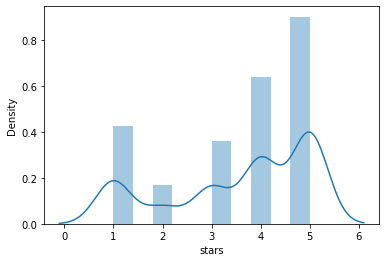

In [126]:
import seaborn as sn
sn.distplot(df['stars'])

# Text preprocessing

1. Remove Punctuations
2. Remove hyperlinks
3. Remove Stopwords
4. Resolve contractions
5. convert numbers to text
6. convert all to lower case

In [127]:
def number_to_text(data):
    temp_str = data.split()
    string = []
    for i in temp_str:

    # if the word is digit, converted to
    # word else the sequence continues

        if i.isdigit():
            temp = inflect.engine().number_to_words(i)
            string.append(temp)
        else:
            string.append(i)
    outputStr = " ".join(string)
    return outputStr

In [128]:
ps = PorterStemmer()
def stem_text(data):
    tokens = word_tokenize(data)
    stemmed_tokens = [ps.stem(word) for word in tokens if word not in (stop_words)]
    return " ".join(stemmed_tokens)

In [129]:
lemma = WordNetLemmatizer()
def lemmatiz_text(data):    
    tokens = word_tokenize(data)
    lemma_tokens = [lemma.lemmatize(word, pos='v') for word in tokens if word not in (stop_words)]
    return " ".join(lemma_tokens)

In [130]:
def cleantext(text):
    text = re.sub(r'[^\w\s]', " ", text) # Remove punctuations
    text = re.sub(r"https?:\/\/\S+", ",", text) # Remove The Hyper Lin
    text = contractions.fix(text) # remove contractions 
    text = number_to_text(text) # convert numbers to text    
    text = text.lower() # convert to lower case
    
    # don't feel it's worth to use stemming as it may lead to some wrong words
    
    text = lemmatiz_text(text) # lemmatization
    
    return text

In [131]:
stop_words = stopwords.words('english') # remove stop words
df["clean_text"] = df["body"].apply(cleantext)
df

stars                                               body  \
0     1.0  This type of Guitar has following disadvantage...   
1     5.0  As a layman (who doesn't know much about guita...   
2     5.0  For 2000 rs its a really really good purchase....   
3     1.0  pros:* The guitar has fair sound for its price...   
4     5.0  It is only for beginners. The price is quite s...   
5     5.0  The media could not be loaded.\n              ...   
6     1.0  I'm beginner , I watched videos on YouTube and...   
7     5.0  This is actually very nice for beginners. I lo...   
8     1.0  I have got damaged item . There is crack on fr...   
9     5.0  I have buy one 2 years ago.. I m still using i...   
10    5.0  As expected stylish, good sound, best for begi...   
11    5.0  Writing a review after extensive usage for ove...   
12    5.0  Excellent product. Its my first guitar. And al...   
13    4.0  I did not get a pick. i had to buy it from loc...   
14    4.0  It was delivered 2 days earlier... Nice Delive...   
15    4.0  The media could not be loaded.\n              ...   
16    1.0  Product is not good. delicate and not so good ...   
17    3.0  this is a good thing that one can have a guita...   
18    5.0  Hi .. This is the most awesome guitar for the ...   
19    2.0  No doubt the price is too good. But if you wan...   
20    5.0  Purchased this a year ago and gifted to my lov...   
21    5.0  I'm writing this a couple of days after delive...   
22    1.0  This was an intended birthday present for a 13...   
23    5.0  The media could not be loaded.\n              ...   
24    1.0  I'm reviewing this after 2 years.If you don't ...   
25    5.0  If you are a complete beginner and wish to sta...   
26    1.0  I had a very pathetic experience with this gui...   
27    1.0  It looks beautiful if you are new to guitar li...   
28    3.0  Good presentation.Average built quality.Averag...   
29    5.0  I have recieved this product and after analyzi...   
30    4.0  The media could not be loaded.\n              ...   
31    1.0  It broke my left eye. While tuning the cheap s...   
32    5.0  It is easy to use and light weight guitar.You ...   
33    2.0  Well . If you are a professional u will probab...   
34    1.0  The first product I ordered had messed up stri...   
35    4.0  The product is shorter than most. Its the best...   
36    1.0  This product is not worthy enough to purchase....   
37    5.0  Received everything intact in the package. Bra...   
38    5.0  I absolutely love this guitar. It sounds perfe...   
39    5.0  Product is awsmVery good for beginners like me...   
40    5.0  Excellent product at this cost..While tuning t...   
41    4.0  No doubt for beginners it is bestGood Sound Qu...   
42    4.0  Good quality guitar... However the string qual...   
43    1.0  I've played a handful of guitars before. This ...   
44    5.0  At this price, you kidding me?It is just aweso...   
45    1.0  Very bad. Please my comments. Never buy this g...   
46    4.0  1)Packaging delivery was all good,It's good fo...   
47    3.0  This is my very first experience with a guitar...   
48    4.0  It is good guitar for extreme beginners. The a...   
49    2.0  It's only 2 month I bought this for my son. Su...   
50    5.0  I got excited about guitars after I saw a few ...   
51    2.0  Hi guys,This guitar is not a bad guitarOnly if...   
52    4.0  Very good for a beginner.Guitar is superb.Tune...   
53    5.0  The media could not be loaded.\n              ...   
54    3.0  I am so mad that I paid so much for this so ca...   
55    1.0  the strings are way too high, when you press i...   
56    3.0  Reasons why you should not buy this guitar* St...   
57    2.0  I purchased this two weeks back and it broke t...   
58    5.0  Best guitar to get started with. This is a bit...   
59    4.0  The Guitar is very good in this price range bu...   
60    5.0  Actually this is one of the best product with ...   
61    5.0  Best guitar to buy for th

# Initial analysis

In [132]:
df['stars'].value_counts()

5.0    361
4.0    256
1.0    171
3.0    145
2.0     67
Name: stars, dtype: int64

In [133]:
complete_review_string = " ".join ([rev for rev in df["clean_text"]])
words = nltk.word_tokenize(complete_review_string)

from nltk.probability import FreqDist
fdist = FreqDist(words)
print(fdist)

<FreqDist with 2199 samples and 16153 outcomes>


In [134]:
fdist.most_common(50)

[('guitar', 803),
 ('good', 704),
 ('product', 389),
 ('string', 386),
 ('quality', 356),
 ('sound', 296),
 ('beginners', 283),
 ('buy', 267),
 ('one', 236),
 ('price', 211),
 ('get', 185),
 ('play', 144),
 ('learn', 132),
 ('break', 127),
 ('also', 119),
 ('tune', 114),
 ('best', 110),
 ('like', 109),
 ('two', 107),
 ('nice', 102),
 ('look', 101),
 ('go', 100),
 ('beginner', 100),
 ('money', 99),
 ('use', 89),
 ('much', 85),
 ('time', 78),
 ('amazon', 76),
 ('thousand', 75),
 ('great', 75),
 ('really', 74),
 ('first', 70),
 ('want', 69),
 ('fret', 67),
 ('pack', 67),
 ('bag', 67),
 ('package', 67),
 ('high', 66),
 ('bad', 65),
 ('give', 63),
 ('pick', 61),
 ('damage', 60),
 ('come', 59),
 ('love', 59),
 ('even', 58),
 ('action', 57),
 ('better', 56),
 ('worth', 55),
 ('delivery', 54),
 ('well', 54)]

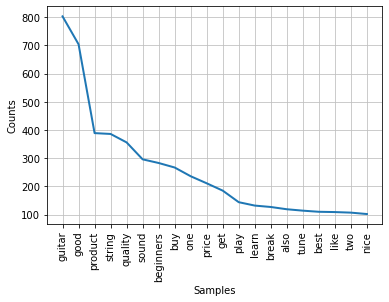

In [135]:
import matplotlib.pyplot as plt
fdist.plot(20,cumulative=False)
plt.show()

<AxesSubplot:ylabel='stars'>

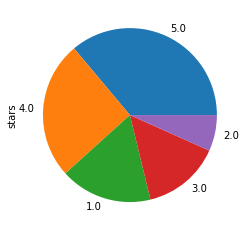

In [136]:
df['stars'].value_counts().plot(kind="pie")

(array([171.,   0., 361.,   0.,   0., 256.,   0., 145.,   0.,  67.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

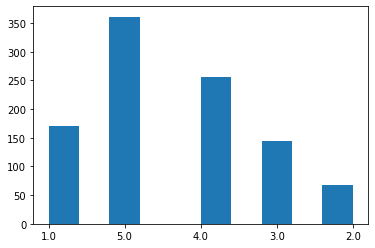

In [137]:
#plotting histogram for rating
plt.hist(df['stars'])

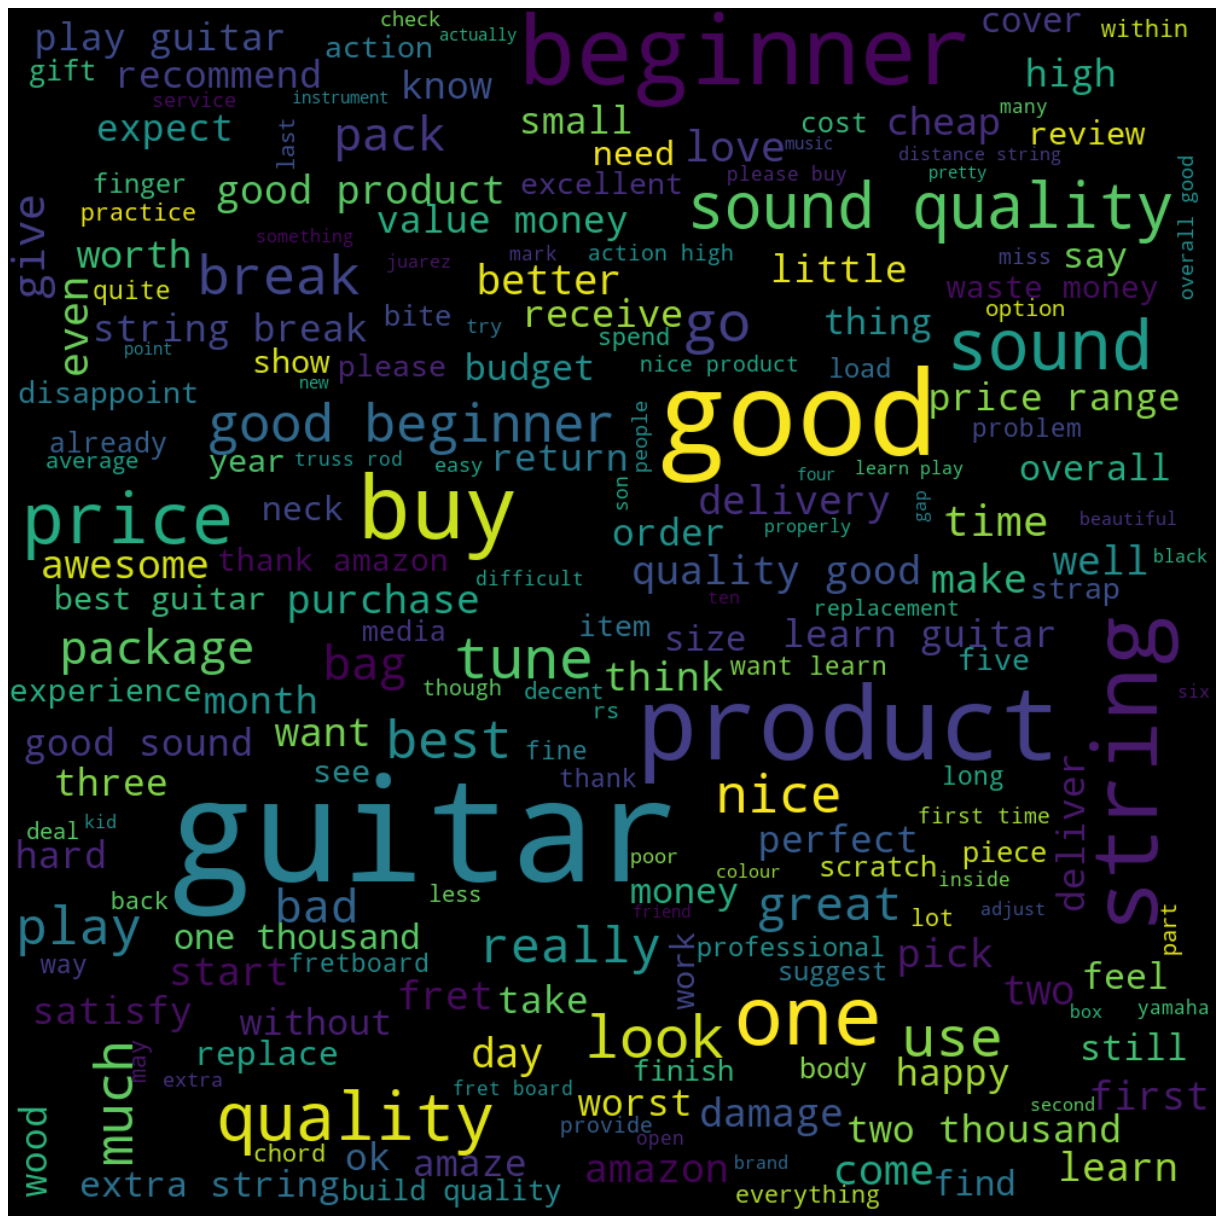

In [138]:
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(complete_review_string)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

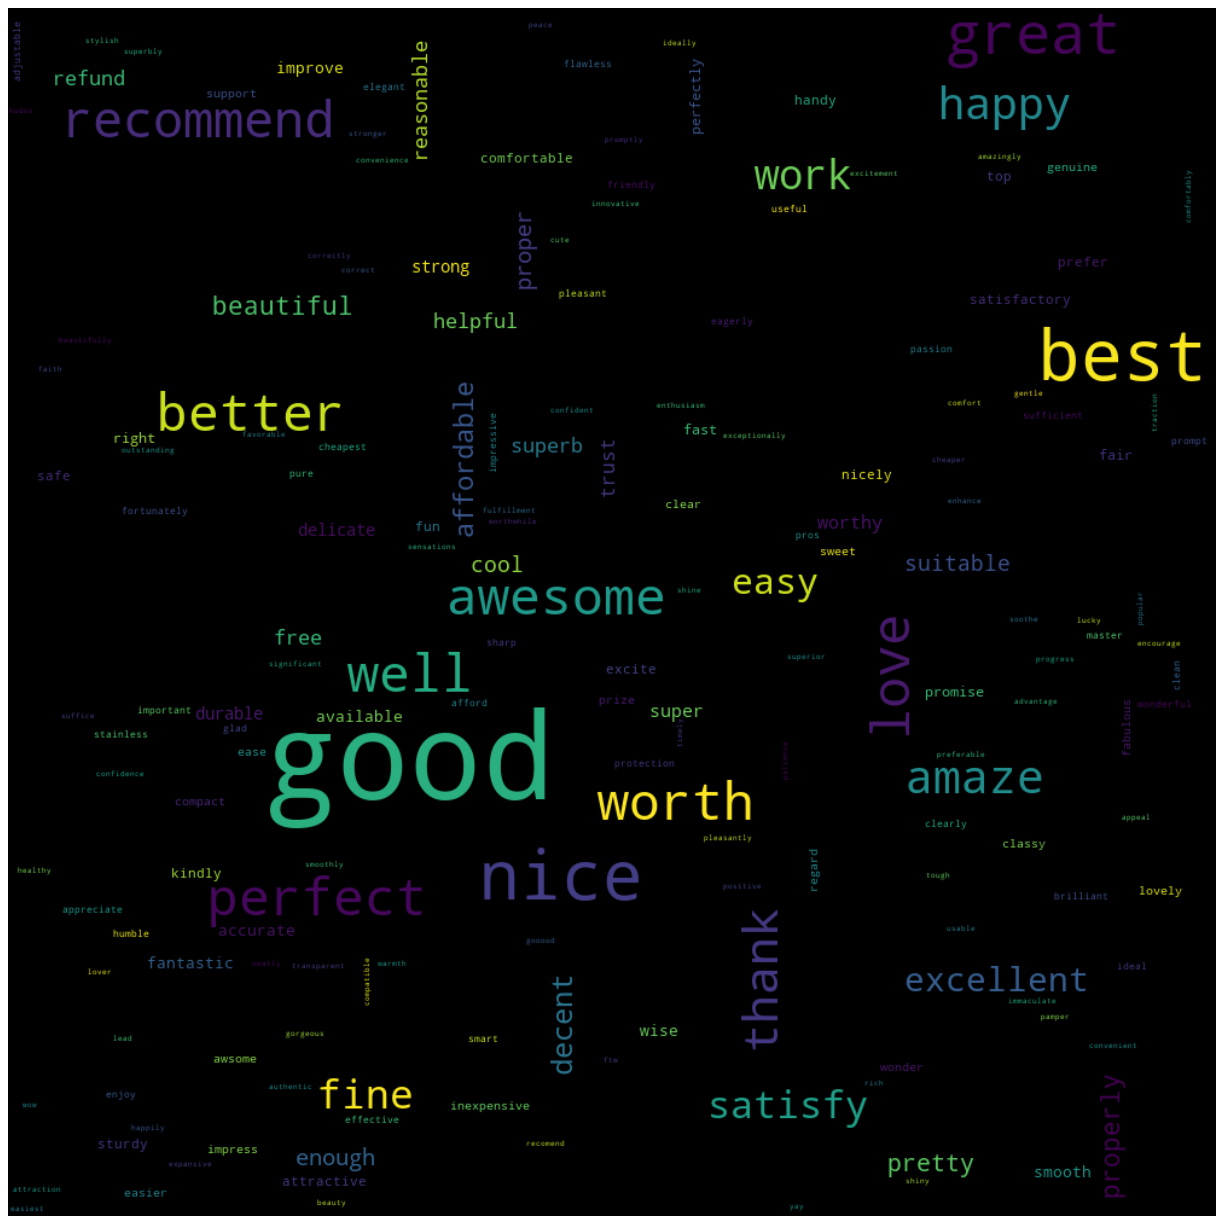

In [139]:
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")  

review_pos = " ".join ([w for w in words if w in poswords])

wordCloudPos = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 100).generate(review_pos)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloudPos, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [140]:
pos_words = nltk.word_tokenize(review_pos)
fdistPos = FreqDist(pos_words)
fdistPos.most_common(50)

[('good', 704),
 ('best', 110),
 ('like', 109),
 ('nice', 102),
 ('great', 75),
 ('love', 59),
 ('better', 56),
 ('worth', 55),
 ('well', 54),
 ('awesome', 53),
 ('perfect', 52),
 ('recommend', 49),
 ('thank', 45),
 ('amaze', 41),
 ('happy', 39),
 ('work', 33),
 ('fine', 32),
 ('satisfy', 31),
 ('easy', 28),
 ('excellent', 24),
 ('decent', 18),
 ('affordable', 15),
 ('beautiful', 14),
 ('properly', 14),
 ('pretty', 13),
 ('enough', 12),
 ('proper', 12),
 ('cool', 11),
 ('suitable', 11),
 ('helpful', 10),
 ('refund', 10),
 ('superb', 10),
 ('reasonable', 10),
 ('free', 10),
 ('trust', 9),
 ('super', 8),
 ('worthy', 8),
 ('delicate', 7),
 ('durable', 7),
 ('strong', 7),
 ('accurate', 6),
 ('smooth', 6),
 ('improve', 6),
 ('available', 6),
 ('wise', 6),
 ('fantastic', 6),
 ('fair', 5),
 ('promise', 5),
 ('perfectly', 5),
 ('right', 5)]

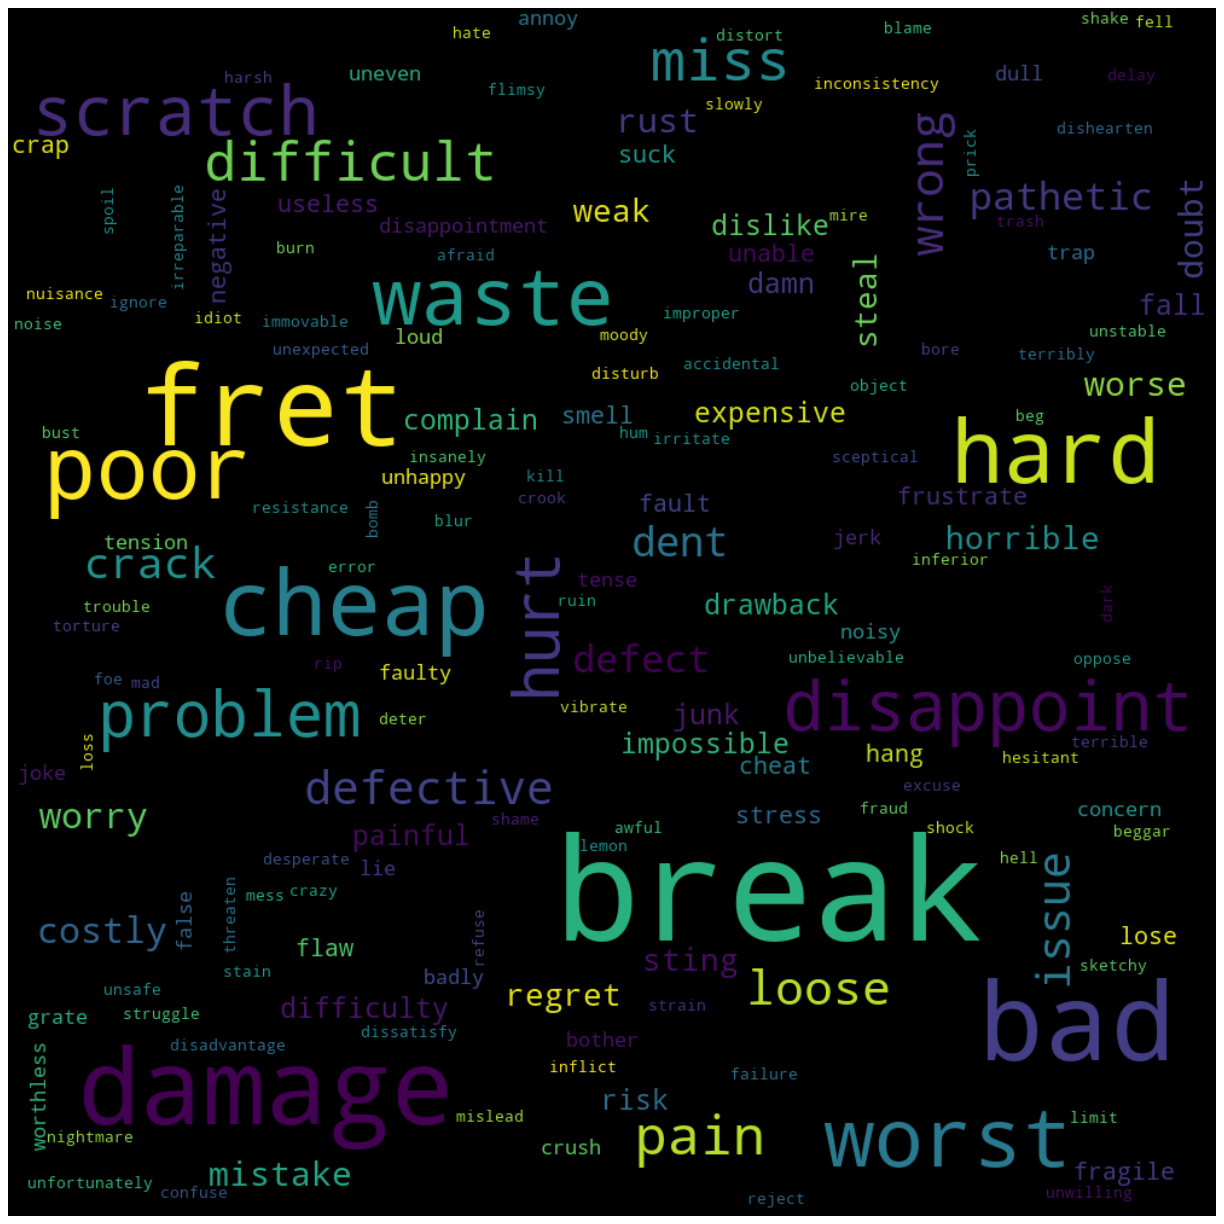

In [141]:
with open("negative-words.txt","r") as pos:
  negwords = pos.read().split("\n")  

review_neg = " ".join ([w for w in words if w in negwords])

wordCloudNeg = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(review_neg)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloudNeg, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [142]:
neg_words = nltk.word_tokenize(review_neg)
fdistNeg = FreqDist(neg_words)
fdistNeg.most_common(50)

[('break', 127),
 ('fret', 67),
 ('bad', 65),
 ('damage', 60),
 ('cheap', 43),
 ('hard', 40),
 ('poor', 40),
 ('worst', 35),
 ('waste', 33),
 ('disappoint', 24),
 ('scratch', 23),
 ('hurt', 20),
 ('miss', 17),
 ('difficult', 15),
 ('pain', 15),
 ('problem', 15),
 ('loose', 12),
 ('wrong', 12),
 ('defective', 11),
 ('issue', 11),
 ('crack', 10),
 ('dent', 9),
 ('pathetic', 8),
 ('defect', 8),
 ('worry', 7),
 ('costly', 7),
 ('doubt', 6),
 ('worse', 6),
 ('mistake', 6),
 ('rust', 6),
 ('steal', 5),
 ('sting', 5),
 ('regret', 5),
 ('weak', 5),
 ('horrible', 5),
 ('problems', 5),
 ('expensive', 4),
 ('junk', 4),
 ('difficulty', 4),
 ('complain', 4),
 ('damn', 4),
 ('impossible', 4),
 ('dislike', 4),
 ('fall', 4),
 ('painful', 4),
 ('risk', 4),
 ('hang', 3),
 ('suck', 3),
 ('flaw', 3),
 ('crap', 3)]

In [143]:
len(pos_words)

2262

In [144]:

len(neg_words)

1004

# Sentiment Analysis using textblob

In [145]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["body"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [146]:
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df

stars                                               body  \
0     1.0  This type of Guitar has following disadvantage...   
1     5.0  As a layman (who doesn't know much about guita...   
2     5.0  For 2000 rs its a really really good purchase....   
3     1.0  pros:* The guitar has fair sound for its price...   
4     5.0  It is only for beginners. The price is quite s...   
5     5.0  The media could not be loaded.\n              ...   
6     1.0  I'm beginner , I watched videos on YouTube and...   
7     5.0  This is actually very nice for beginners. I lo...   
8     1.0  I have got damaged item . There is crack on fr...   
9     5.0  I have buy one 2 years ago.. I m still using i...   
10    5.0  As expected stylish, good sound, best for begi...   
11    5.0  Writing a review after extensive usage for ove...   
12    5.0  Excellent product. Its my first guitar. And al...   
13    4.0  I did not get a pick. i had to buy it from loc...   
14    4.0  It was delivered 2 days earlier... Nice Delive...   
15    4.0  The media could not be loaded.\n              ...   
16    1.0  Product is not good. delicate and not so good ...   
17    3.0  this is a good thing that one can have a guita...   
18    5.0  Hi .. This is the most awesome guitar for the ...   
19    2.0  No doubt the price is too good. But if you wan...   
20    5.0  Purchased this a year ago and gifted to my lov...   
21    5.0  I'm writing this a couple of days after delive...   
22    1.0  This was an intended birthday present for a 13...   
23    5.0  The media could not be loaded.\n              ...   
24    1.0  I'm reviewing this after 2 years.If you don't ...   
25    5.0  If you are a complete beginner and wish to sta...   
26    1.0  I had a very pathetic experience with this gui...   
27    1.0  It looks beautiful if you are new to guitar li...   
28    3.0  Good presentation.Average built quality.Averag...   
29    5.0  I have recieved this product and after analyzi...   
30    4.0  The media could not be loaded.\n              ...   
31    1.0  It broke my left eye. While tuning the cheap s...   
32    5.0  It is easy to use and light weight guitar.You ...   
33    2.0  Well . If you are a professional u will probab...   
34    1.0  The first product I ordered had messed up stri...   
35    4.0  The product is shorter than most. Its the best...   
36    1.0  This product is not worthy enough to purchase....   
37    5.0  Received everything intact in the package. Bra...   
38    5.0  I absolutely love this guitar. It sounds perfe...   
39    5.0  Product is awsmVery good for beginners like me...   
40    5.0  Excellent product at this cost..While tuning t...   
41    4.0  No doubt for beginners it is bestGood Sound Qu...   
42    4.0  Good quality guitar... However the string qual...   
43    1.0  I've played a handful of guitars before. This ...   
44    5.0  At this price, you kidding me?It is just aweso...   
45    1.0  Very bad. Please my comments. Never buy this g...   
46    4.0  1)Packaging delivery was all good,It's good fo...   
47    3.0  This is my very first experience with a guitar...   
48    4.0  It is good guitar for extreme beginners. The a...   
49    2.0  It's only 2 month I bought this for my son. Su...   
50    5.0  I got excited about guitars after I saw a few ...   
51    2.0  Hi guys,This guitar is not a bad guitarOnly if...   
52    4.0  Very good for a beginner.Guitar is superb.Tune...   
53    5.0  The media could not be loaded.\n              ...   
54    3.0  I am so mad that I paid so much for this so ca...   
55    1.0  the strings are way too high, when you press i...   
56    3.0  Reasons why you should not buy this guitar* St...   
57    2.0  I purchased this two weeks back and it broke t...   
58    5.0  Best guitar to get started with. This is a bit...   
59    4.0  The Guitar is very good in this price range bu...   
60    5.0  Actually this is one of the best product with ...   
61    5.0  Best guitar to buy for th

In [147]:
def analysis(score):
    if score < 0:
        return "0"
    elif score == 0:
        return "-1"
    else:
        return "1"

In [148]:
df["analysis"] = df["polarity"].apply(analysis)
df

stars                                               body  \
0     1.0  This type of Guitar has following disadvantage...   
1     5.0  As a layman (who doesn't know much about guita...   
2     5.0  For 2000 rs its a really really good purchase....   
3     1.0  pros:* The guitar has fair sound for its price...   
4     5.0  It is only for beginners. The price is quite s...   
5     5.0  The media could not be loaded.\n              ...   
6     1.0  I'm beginner , I watched videos on YouTube and...   
7     5.0  This is actually very nice for beginners. I lo...   
8     1.0  I have got damaged item . There is crack on fr...   
9     5.0  I have buy one 2 years ago.. I m still using i...   
10    5.0  As expected stylish, good sound, best for begi...   
11    5.0  Writing a review after extensive usage for ove...   
12    5.0  Excellent product. Its my first guitar. And al...   
13    4.0  I did not get a pick. i had to buy it from loc...   
14    4.0  It was delivered 2 days earlier... Nice Delive...   
15    4.0  The media could not be loaded.\n              ...   
16    1.0  Product is not good. delicate and not so good ...   
17    3.0  this is a good thing that one can have a guita...   
18    5.0  Hi .. This is the most awesome guitar for the ...   
19    2.0  No doubt the price is too good. But if you wan...   
20    5.0  Purchased this a year ago and gifted to my lov...   
21    5.0  I'm writing this a couple of days after delive...   
22    1.0  This was an intended birthday present for a 13...   
23    5.0  The media could not be loaded.\n              ...   
24    1.0  I'm reviewing this after 2 years.If you don't ...   
25    5.0  If you are a complete beginner and wish to sta...   
26    1.0  I had a very pathetic experience with this gui...   
27    1.0  It looks beautiful if you are new to guitar li...   
28    3.0  Good presentation.Average built quality.Averag...   
29    5.0  I have recieved this product and after analyzi...   
30    4.0  The media could not be loaded.\n              ...   
31    1.0  It broke my left eye. While tuning the cheap s...   
32    5.0  It is easy to use and light weight guitar.You ...   
33    2.0  Well . If you are a professional u will probab...   
34    1.0  The first product I ordered had messed up stri...   
35    4.0  The product is shorter than most. Its the best...   
36    1.0  This product is not worthy enough to purchase....   
37    5.0  Received everything intact in the package. Bra...   
38    5.0  I absolutely love this guitar. It sounds perfe...   
39    5.0  Product is awsmVery good for beginners like me...   
40    5.0  Excellent product at this cost..While tuning t...   
41    4.0  No doubt for beginners it is bestGood Sound Qu...   
42    4.0  Good quality guitar... However the string qual...   
43    1.0  I've played a handful of guitars before. This ...   
44    5.0  At this price, you kidding me?It is just aweso...   
45    1.0  Very bad. Please my comments. Never buy this g...   
46    4.0  1)Packaging delivery was all good,It's good fo...   
47    3.0  This is my very first experience with a guitar...   
48    4.0  It is good guitar for extreme beginners. The a...   
49    2.0  It's only 2 month I bought this for my son. Su...   
50    5.0  I got excited about guitars after I saw a few ...   
51    2.0  Hi guys,This guitar is not a bad guitarOnly if...   
52    4.0  Very good for a beginner.Guitar is superb.Tune...   
53    5.0  The media could not be loaded.\n              ...   
54    3.0  I am so mad that I paid so much for this so ca...   
55    1.0  the strings are way too high, when you press i...   
56    3.0  Reasons why you should not buy this guitar* St...   
57    2.0  I purchased this two weeks back and it broke t...   
58    5.0  Best guitar to get started with. This is a bit...   
59    4.0  The Guitar is very good in this price range bu...   
60    5.0  Actually this is one of the best product with ...   
61    5.0  Best guitar to buy for th

(array([789.,   0.,   0.,   0.,   0., 168.,   0.,   0.,   0.,  43.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

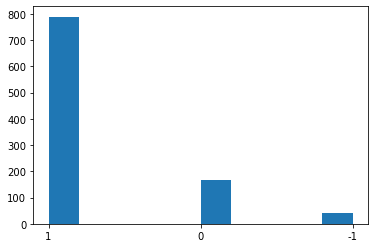

In [149]:
plt.hist(df['analysis'])

## **Balancing of data**

In [150]:
df.analysis.value_counts()

1     789
0     168
-1     43
Name: analysis, dtype: int64

In [151]:
df.head()

stars                                               body               date  \
0   1.0  This type of Guitar has following disadvantage...        31 May 2018   
1   5.0  As a layman (who doesn't know much about guita...    14 October 2018   
2   5.0  For 2000 rs its a really really good purchase....     11 August 2018   
3   1.0  pros:* The guitar has fair sound for its price...    30 January 2019   
4   5.0  It is only for beginners. The price is quite s...  24 September 2019   

                                          clean_text  subjectivity  polarity  \
0  type guitar follow disadvantages1 string good ...      0.350000  0.350000   
1  layman know much guitars product awesome feel ...      0.488889  0.512500   
2  two thousand rs really really good purchase be...      0.411111  0.408333   
3  pros guitar fair sound price look goodcon acti...      0.558278  0.163389   
4  beginners price quite satisfactory budget frie...      0.700000  0.200000   

  analysis  
0        1  
1        1  
2        1  
3        1  
4        1

In [152]:

df.shape

(1000, 7)

In [153]:
# removing 'Neutral' reviews
df= df[df.analysis != '-1']

(array([789.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 168.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

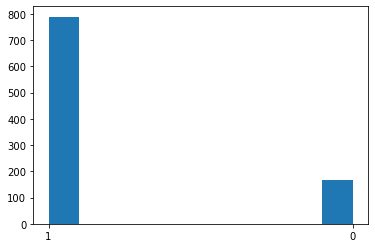

In [154]:
plt.hist(df['analysis'])

In [155]:
# shape of df before balancing
df.shape

(957, 7)

In [156]:
# separating Dependent and independent features 
x= df.iloc[:,0:6]    # Independent

In [157]:
x.head()

stars                                               body               date  \
0   1.0  This type of Guitar has following disadvantage...        31 May 2018   
1   5.0  As a layman (who doesn't know much about guita...    14 October 2018   
2   5.0  For 2000 rs its a really really good purchase....     11 August 2018   
3   1.0  pros:* The guitar has fair sound for its price...    30 January 2019   
4   5.0  It is only for beginners. The price is quite s...  24 September 2019   

                                          clean_text  subjectivity  polarity  
0  type guitar follow disadvantages1 string good ...      0.350000  0.350000  
1  layman know much guitars product awesome feel ...      0.488889  0.512500  
2  two thousand rs really really good purchase be...      0.411111  0.408333  
3  pros guitar fair sound price look goodcon acti...      0.558278  0.163389  
4  beginners price quite satisfactory budget frie...      0.700000  0.200000

In [158]:
# dependent feature
y= df.iloc[:,-1:] 

In [159]:
y.head()

analysis
0        1
1        1
2        1
3        1
4        1

In [160]:
# number of Positive & Negative reviews before balancing
y.analysis.value_counts()

1    789
0    168
Name: analysis, dtype: int64

Status before over sampling dataset


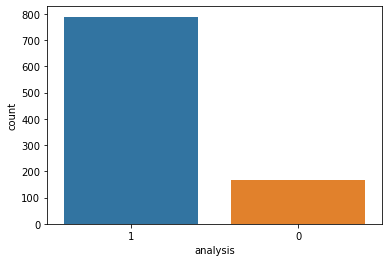

In [161]:
sn.countplot(x=y['analysis']);
print("Status before over sampling dataset")

## RandomOverSampler

In [162]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
#import collections

In [163]:
over = RandomOverSampler(sampling_strategy=.9)
# fit and apply the transform
#x, y = over.fit_resample(scaled_x_df1, Y)

X, Y = over.fit_resample(x, y)

In [164]:
X.shape

(1499, 6)

In [165]:
# number of Positive & Negative reviews after balancing
Y.value_counts()

analysis
1           789
0           710
dtype: int64

Status after over sampling dataset


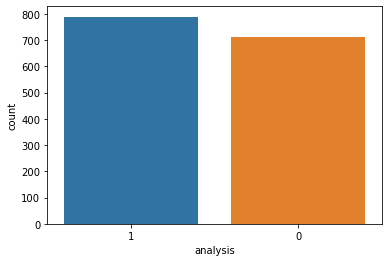

In [166]:
sn.countplot(x=Y['analysis']);
print("Status after over sampling dataset")

In [167]:
df_balanced = pd.concat([X,Y], axis=1)

In [168]:
# shape of df after balancing
df_balanced.shape

(1499, 7)

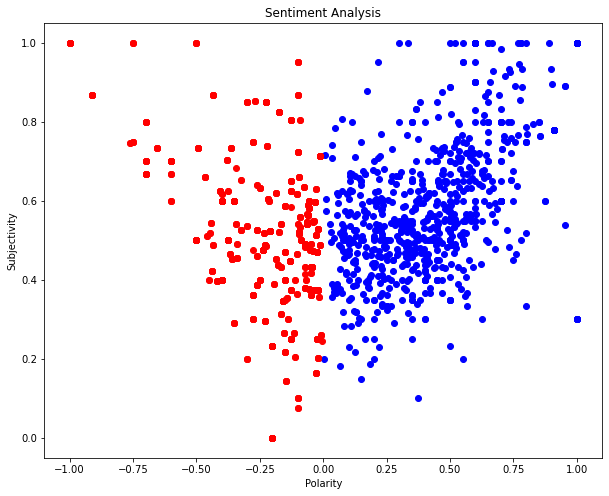

In [169]:
plt.figure(figsize=(10, 8))

for i in range(0, df_balanced.shape[0]):
    if(df_balanced["polarity"][i]>0):
        plt.scatter(df_balanced["polarity"][i], df_balanced["subjectivity"][i], color = "Blue")
    else:
        plt.scatter(df_balanced["polarity"][i], df_balanced["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [170]:
pd.set_option('display.max_rows', None)

df_balanced

stars                                               body  \
0      1.0  This type of Guitar has following disadvantage...   
1      5.0  As a layman (who doesn't know much about guita...   
2      5.0  For 2000 rs its a really really good purchase....   
3      1.0  pros:* The guitar has fair sound for its price...   
4      5.0  It is only for beginners. The price is quite s...   
5      5.0  The media could not be loaded.\n              ...   
6      1.0  I'm beginner , I watched videos on YouTube and...   
7      5.0  This is actually very nice for beginners. I lo...   
8      1.0  I have got damaged item . There is crack on fr...   
9      5.0  As expected stylish, good sound, best for begi...   
10     5.0  Writing a review after extensive usage for ove...   
11     5.0  Excellent product. Its my first guitar. And al...   
12     4.0  I did not get a pick. i had to buy it from loc...   
13     4.0  It was delivered 2 days earlier... Nice Delive...   
14     4.0  The media could not be loaded.\n              ...   
15     1.0  Product is not good. delicate and not so good ...   
16     3.0  this is a good thing that one can have a guita...   
17     5.0  Hi .. This is the most awesome guitar for the ...   
18     2.0  No doubt the price is too good. But if you wan...   
19     5.0  Purchased this a year ago and gifted to my lov...   
20     5.0  I'm writing this a couple of days after delive...   
21     1.0  This was an intended birthday present for a 13...   
22     5.0  The media could not be loaded.\n              ...   
23     1.0  I'm reviewing this after 2 years.If you don't ...   
24     5.0  If you are a complete beginner and wish to sta...   
25     1.0  I had a very pathetic experience with this gui...   
26     1.0  It looks beautiful if you are new to guitar li...   
27     3.0  Good presentation.Average built quality.Averag...   
28     5.0  I have recieved this product and after analyzi...   
29     4.0  The media could not be loaded.\n              ...   
30     1.0  It broke my left eye. While tuning the cheap s...   
31     5.0  It is easy to use and light weight guitar.You ...   
32     2.0  Well . If you are a professional u will probab...   
33     1.0  The first product I ordered had messed up stri...   
34     4.0  The product is shorter than most. Its the best...   
35     1.0  This product is not worthy enough to purchase....   
36     5.0  Received everything intact in the package. Bra...   
37     5.0  I absolutely love this guitar. It sounds perfe...   
38     5.0  Product is awsmVery good for beginners like me...   
39     5.0  Excellent product at this cost..While tuning t...   
40     4.0  No doubt for beginners it is bestGood Sound Qu...   
41     4.0  Good quality guitar... However the string qual...   
42     1.0  I've played a handful of guitars before. This ...   
43     5.0  At this price, you kidding me?It is just aweso...   
44     1.0  Very bad. Please my comments. Never buy this g...   
45     4.0  1)Packaging delivery was all good,It's good fo...   
46     3.0  This is my very first experience with a guitar...   
47     4.0  It is good guitar for extreme beginners. The a...   
48     2.0  It's only 2 month I bought this for my son. Su...   
49     5.0  I got excited about guitars after I saw a few ...   
50     2.0  Hi guys,This guitar is not a bad guitarOnly if...   
51     4.0  Very good for a beginner.Guitar is superb.Tune...   
52     5.0  The media could not be loaded.\n              ...   
53     3.0  I am so mad that I paid so much for this so ca...   
54     1.0  the strings are way too high, when you press i...   
55     3.0  Reasons why you should not buy this guitar* St...   
56     2.0  I purchased this two weeks back and it broke t...   
57     5.0  Best guitar to get started with. This is a bit...   
58     4.0  The Guitar is very good in this price range bu...   
59     5.0  Actually this is one of the best product with ...   
60     5.0  Best guitar to buy for the b

# Vectorization

In [171]:
x_train, x_test, y_train, y_test = train_test_split(df_balanced["clean_text"],df_balanced["analysis"],test_size=0.2,shuffle=True)

In [172]:
x_train

1278    product defect apply replace refund product on...
242     speak plus point guitar classy look good sound...
526                                        good beginners
511     awesome product idea guitars receive felt happ...
1008    value money lower e hard still better learn ha...
1332    1st get break piece exchange piece satisfy pie...
509     love way come pack good guitar budget segment ...
1304           base guitar high unable concentrate rhythm
1318    intend birthday present thirteen year old musi...
5                                   media could load love
225     buy rs two thousand , one hundred seventy-five...
697     string wer nt standards need better string gui...
438                                   good size also good
787                                        good beginners
1265    beginner watch videos youtube buy product know...
506     worst pack receive damage product courier guy ...
321     idea regard guitars go sit buy one actually lo...
1253    guitar

In [173]:
y_train

1278    0
242     1
526     1
511     1
1008    0
1332    0
509     1
1304    0
1318    0
5       1
225     1
697     1
438     1
787     1
1265    0
506     0
321     1
1253    0
72      1
392     1
1383    0
804     1
566     1
1442    0
1397    0
69      1
1113    0
391     0
520     1
1065    0
122     1
644     0
578     1
1203    0
614     1
828     1
972     0
366     0
677     1
616     0
37      1
283     1
171     1
864     0
563     0
749     1
1127    0
806     1
1139    0
615     1
335     1
630     0
386     0
854     1
1384    0
541     1
160     1
603     1
1343    0
380     1
493     1
1058    0
443     1
739     1
663     1
843     1
946     1
1329    0
1191    0
1366    0
1389    0
162     1
835     1
64      1
33      1
547     1
317     1
411     0
1432    0
390     1
1144    0
1358    0
441     1
1246    0
1434    0
1001    0
1259    0
1401    0
1084    0
31      1
959     0
189     1
287     1
1152    0
1174    0
728     1
220     0
710     1
840     1
96      1


In [174]:
type(x_test)

pandas.core.series.Series


# Tf-Idf

In [175]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
tf_x_train = tfidf_vectorizer.fit_transform(x_train)
tf_x_test = tfidf_vectorizer.transform(x_test)

In [176]:
print(tf_x_train)

  (0, 291)	0.14183905709142045
  (0, 563)	0.2400542159992503
  (0, 1105)	0.2816044726059209
  (0, 106)	0.3984008286924488
  (0, 588)	0.2451788176050621
  (0, 170)	0.18067148399850955
  (0, 745)	0.09757984542457405
  (0, 1231)	0.32601967405333543
  (0, 1152)	0.15451632564120857
  (0, 1373)	0.2791004259845994
  (0, 1386)	0.22233824896834892
  (0, 128)	0.3319548187584135
  (0, 445)	0.2816044726059209
  (0, 1301)	0.3673746640926676
  (1, 279)	0.28659080708032797
  (1, 80)	0.21119736870548816
  (1, 717)	0.1316822680823285
  (1, 1111)	0.14224044334627883
  (1, 1347)	0.1677204368281157
  (1, 1285)	0.11035729420171696
  (1, 1842)	0.23805305331539187
  (1, 802)	0.14224044334627883
  (1, 976)	0.16863211566759653
  (1, 1454)	0.19936549014345828
  (1, 1592)	0.08269017547321253
  :	:
  (1197, 1124)	0.378787666967685
  (1197, 997)	0.34903878978148295
  (1197, 1081)	0.29266546445787756
  (1197, 932)	0.3450178157470533
  (1197, 755)	0.3675697332503337
  (1197, 1285)	0.22328572160052718
  (1197, 1539)	

In [177]:
dfModels = pd.DataFrame(columns=['Model', 'Accuracy'])

# SVM

In [247]:
from sklearn.svm import LinearSVC
clf1 = LinearSVC(random_state=0)

In [248]:
modelSVM = clf1.fit(tf_x_train,y_train)

In [249]:
y_test_pred=clf1.predict(tf_x_test)

In [250]:
reportSVM=classification_report(y_test, y_test_pred,output_dict=True)
reportSVM

{'0': {'precision': 0.9261744966442953,
  'recall': 0.9857142857142858,
  'f1-score': 0.9550173010380623,
  'support': 140},
 '1': {'precision': 0.9867549668874173,
  'recall': 0.93125,
  'f1-score': 0.9581993569131833,
  'support': 160},
 'accuracy': 0.9566666666666667,
 'macro avg': {'precision': 0.9564647317658563,
  'recall': 0.9584821428571428,
  'f1-score': 0.9566083289756228,
  'support': 300},
 'weighted avg': {'precision': 0.9584840807739603,
  'recall': 0.9566666666666667,
  'f1-score': 0.9567143975047934,
  'support': 300}}

In [251]:
SVMAcc = accuracy_score(y_test, y_test_pred)

dfModels.loc[1, 'Model'] = 'SVM'
dfModels.loc[1, 'Accuracy'] = SVMAcc

# Logistic Regression

In [252]:
clf2 = LogisticRegression(max_iter=1000,solver='saga')
clf2.fit(tf_x_train,y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [253]:
y_test_pred=clf2.predict(tf_x_test)

In [254]:
reportLR=classification_report(y_test, y_test_pred,output_dict=True)

In [255]:
reportLR

{'0': {'precision': 0.8972602739726028,
  'recall': 0.9357142857142857,
  'f1-score': 0.9160839160839161,
  'support': 140},
 '1': {'precision': 0.9415584415584416,
  'recall': 0.90625,
  'f1-score': 0.9235668789808917,
  'support': 160},
 'accuracy': 0.92,
 'macro avg': {'precision': 0.9194093577655222,
  'recall': 0.9209821428571429,
  'f1-score': 0.919825397532404,
  'support': 300},
 'weighted avg': {'precision': 0.9208859633517168,
  'recall': 0.92,
  'f1-score': 0.9200748296289699,
  'support': 300}}

In [256]:
LRAcc = accuracy_score(y_test, y_test_pred)

dfModels.loc[2, 'Model'] = 'LR'
dfModels.loc[2, 'Accuracy'] = LRAcc

# Naive Bayes

In [257]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(tf_x_train, y_train)

MultinomialNB()

In [258]:
y_predict = nb_tfidf.predict(tf_x_test)
y_prob = nb_tfidf.predict_proba(tf_x_test)[:,1]
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       140
           1       0.92      0.87      0.89       160

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [259]:
NBAcc = accuracy_score(y_test, y_predict)

dfModels.loc[3, 'Model'] = 'NB'
dfModels.loc[3, 'Accuracy'] = NBAcc

# Decision Tree

In [260]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 42 )

In [261]:
tree_pruned = DecisionTreeClassifier(random_state = 42, criterion = 'gini', ccp_alpha = 0.0015)
tree_pruned.fit(tf_x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0015, random_state=42)

In [262]:
predictions = tree_pruned.predict(tf_x_test)
pred_df = pd.DataFrame()
pred_df['Actual'] = y_test
pred_df['Predicted'] = predictions
np.mean(predictions == y_test)

0.9166666666666666

In [263]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       140
           1       0.99      0.86      0.92       160

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.93      0.92      0.92       300



In [264]:
DTAcc = accuracy_score(y_test, predictions)

dfModels.loc[4, 'Model'] = 'Decision Tree'
dfModels.loc[4, 'Accuracy'] = DTAcc

# KNN

In [265]:
from sklearn.neighbors import KNeighborsClassifier

In [266]:
knn = KNeighborsClassifier(n_neighbors=7)

clfknn = knn.fit(tf_x_train, y_train)
predictedknn = clfknn.predict(tf_x_test)

In [267]:
print(classification_report(y_test, predictedknn))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       140
           1       0.88      0.80      0.84       160

    accuracy                           0.83       300
   macro avg       0.83      0.84      0.83       300
weighted avg       0.84      0.83      0.83       300



In [268]:
KNNAcc = accuracy_score(y_test, predictedknn)

dfModels.loc[5, 'Model'] = 'KNN'
dfModels.loc[5, 'Accuracy'] = KNNAcc

In [269]:
def get_percentage(num):
    return "{:.2f}".format(num*100)

In [270]:
dfModels["Accuracy"] = dfModels["Accuracy"].apply(get_percentage)
dfModels

Model Accuracy
1            SVM    95.67
2             LR    92.00
3             NB    89.00
4  Decision Tree    91.67
5            KNN    83.33

In [271]:
docs_new = ['It hurts me as the strings are very tough',
            'I like the quality of the guitar as it sounds very nice.', 
            'It hurts me as the strings are very hard',
            'It needs a lot of maintenance, so difficult to keep it well.',
            'damaged',
            'This is actually very nice for beginners. I loved it. Its actually cool that you receive it with extra strings and picks.'
           ]

In [272]:
docs_new_clean = list(map(cleantext, docs_new))
docs_new_clean


['hurt string tough',
 'like quality guitar sound nice',
 'hurt string hard',
 'need lot maintenance difficult keep well',
 'damage',
 'actually nice beginners love actually cool receive extra string pick']

In [273]:
docs_new_tf = tfidf_vectorizer.transform(docs_new_clean)
docs_new_tf

<6x1903 sparse matrix of type '<class 'numpy.float64'>'
	with 27 stored elements in Compressed Sparse Row format>

In [274]:
#predicted_knn = clfknn.predict(docs_new_tf)
#predicted_knn

In [275]:
predicted_svm=clf1.predict(docs_new_tf)
predicted_svm

array(['1', '1', '0', '0', '0', '1'], dtype=object)

In [276]:
pickle_out = open("model_sentiment.pkl","wb")
pickle.dump(modelSVM,pickle_out)
pickle_out.close()

In [277]:
pickle_out_tfidf = open("model_sentiment_tfidf.pkl","wb")
pickle.dump(tfidf_vectorizer,pickle_out_tfidf)
pickle_out_tfidf.close()

In [278]:
reviewText = "guitar sound is bad"

In [279]:
cleanReviewText = cleantext(reviewText)
cleanReviewText

'guitar sound bad'

In [280]:
textTfIDF = tfidf_vectorizer.transform([cleanReviewText])

In [281]:
predictedOutput=clf1.predict(textTfIDF)
predictedOutput = predictedOutput[0]
predictedOutput

'0'

In [282]:
prdictionDist = clf1._predict_proba_lr(textTfIDF)
prdictionDist

array([[0.67545503, 0.32454497]])

In [288]:
type(prdictionDist)

numpy.ndarray

In [298]:
from tabulate import tabulate
dfRes = pd.DataFrame(columns=['Negative', 'Positive'])
dfRes.loc[1, 'Negative'] = get_percentage(prdictionDist[0][0])
dfRes.loc[1, 'Positive'] = get_percentage(prdictionDist[0][1])

In [299]:
print(tabulate(dfRes, headers=dfRes.columns, tablefmt="fancy_grid", showindex="never"))

╒════════════╤════════════╕
│   Negative │   Positive │
╞════════════╪════════════╡
│      67.55 │      32.45 │
╘════════════╧════════════╛
